In [20]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:
#Importing the dataset
dataset = pd.read_csv('C:/Users/jites/Desktop/AIMC Novice/week 8/datasets_721951_1255613_Country-data.csv')

In [22]:
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [23]:
#Check for null
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


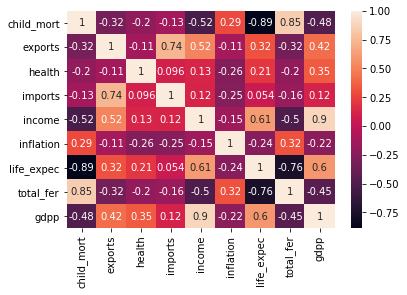

In [24]:
#Correlation heat map
plt.figure()
sns.heatmap(dataset.corr(), annot=True)

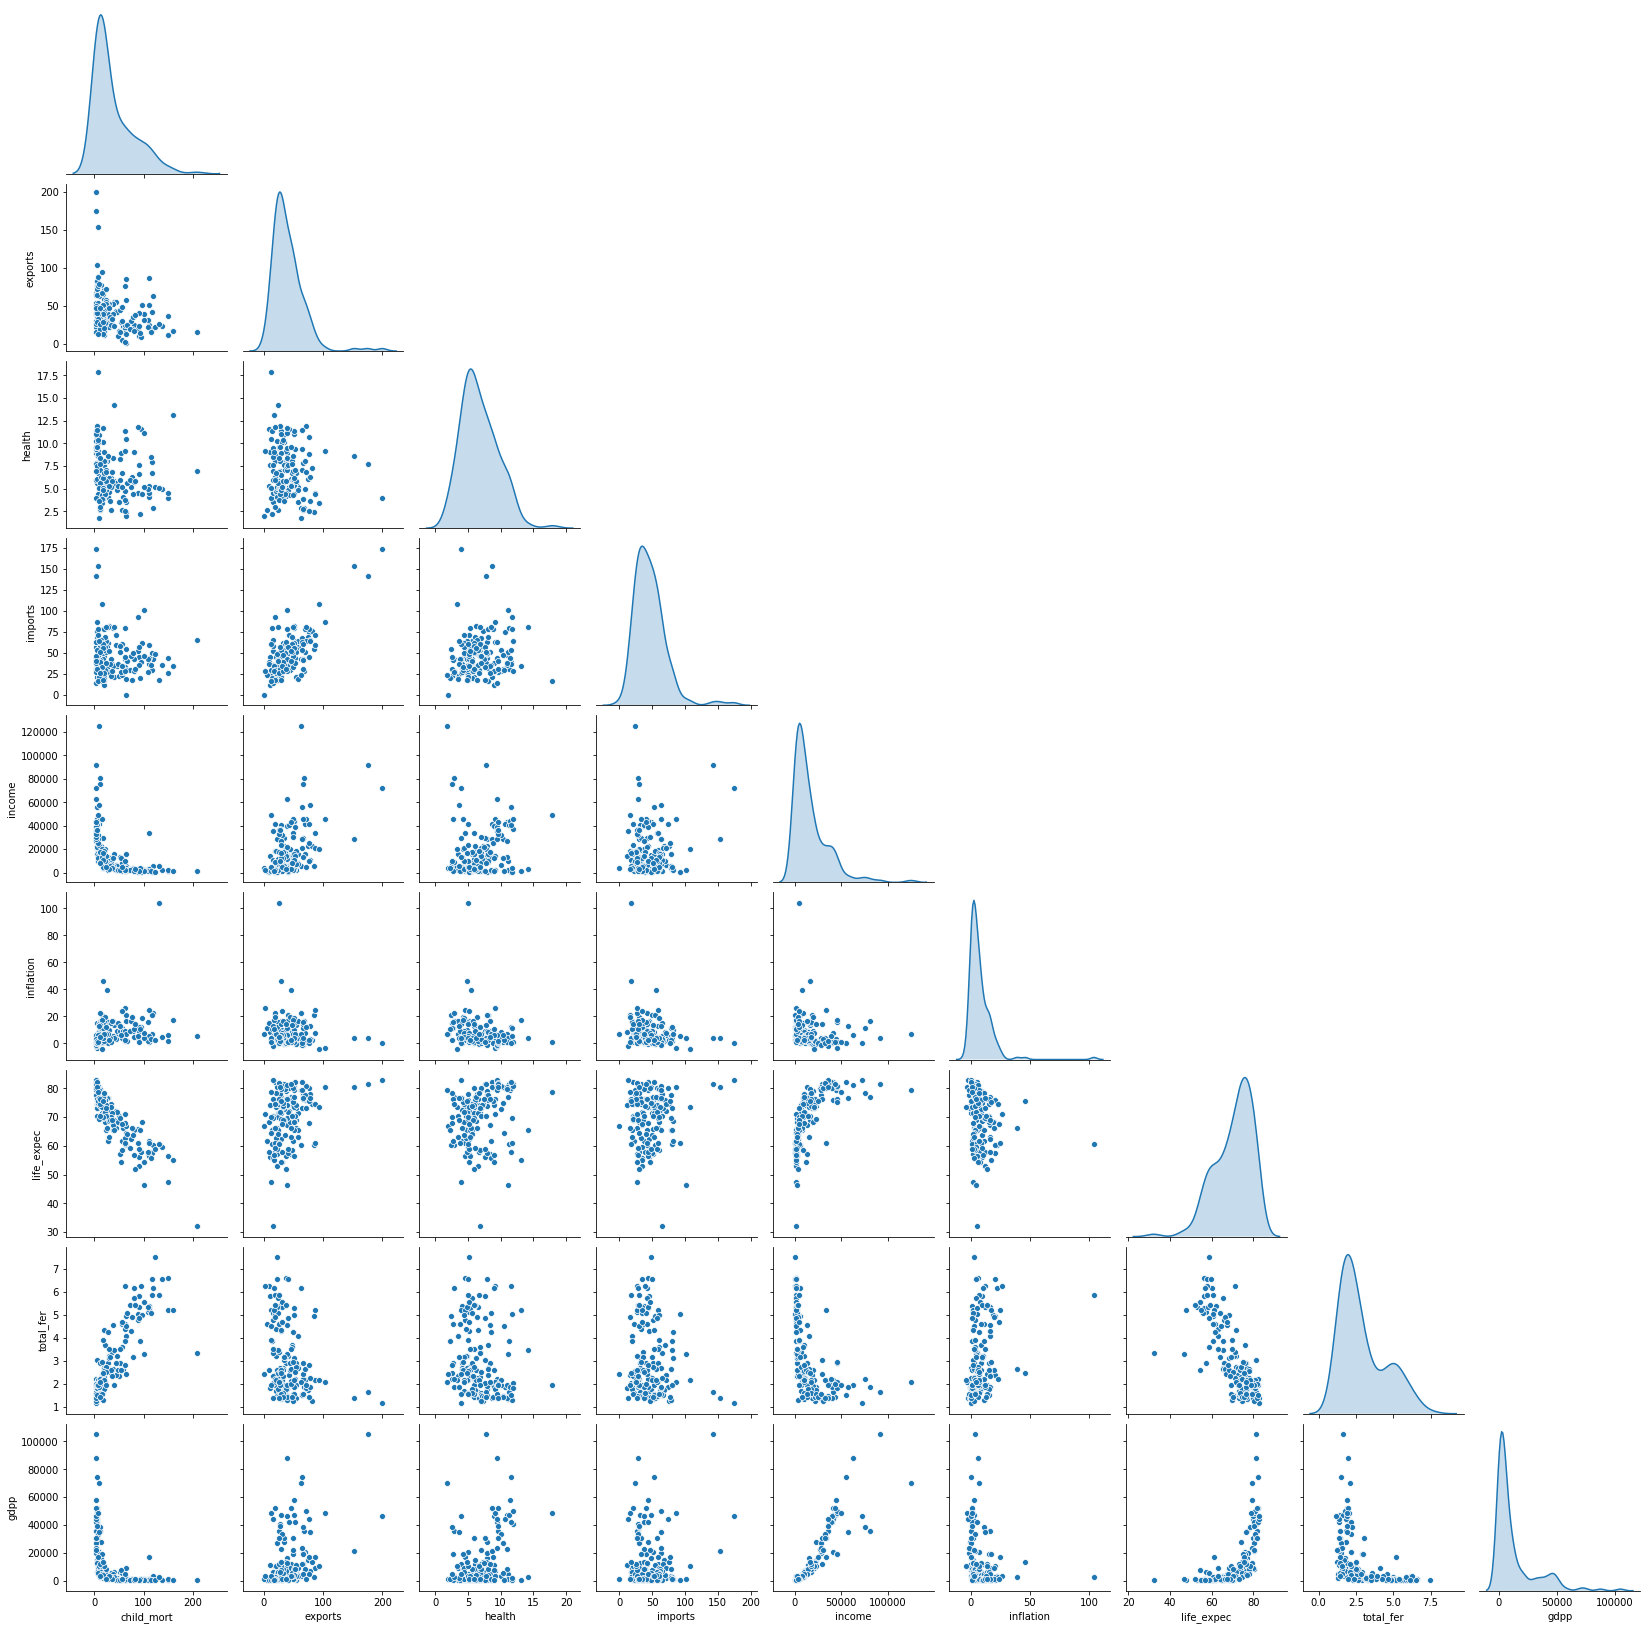

In [25]:
#Bivariate Analysis - Pairplot
sns.pairplot(dataset, diag_kind='kde', corner=True)

In [26]:
#Dropping the column country
dataset.drop(columns='country', inplace=True)

In [ ]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset_scaled = sc.fit_transform(dataset)

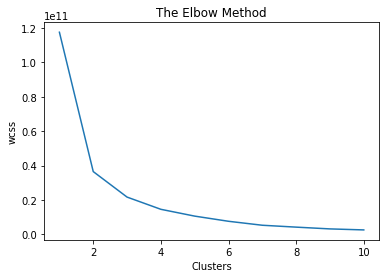

In [34]:
#Calculating sum of squared distances and finding optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('wcss')
plt.show()

In [35]:
#Applying Kmeans to our dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(dataset)

In [36]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [37]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_model = pca.fit_transform(dataset)
dataset_transformed = pd.DataFrame(data=pca_model, columns=['PCA 1', 'PCA 2'])
dataset_transformed['Cluster'] = y_kmeans

In [38]:
dataset_transformed.head()

,PCA 1,PCA 2,Cluster
0,-19815.128018,-1651.124720,0
1,-11338.938992,1493.469028,0
2,-8926.352589,3264.684102,0
3,-14652.465937,-867.795270,0
4,896.142032,1898.478151,0


Text(0.5, 1.0, 'Countries Clusters with PCA')

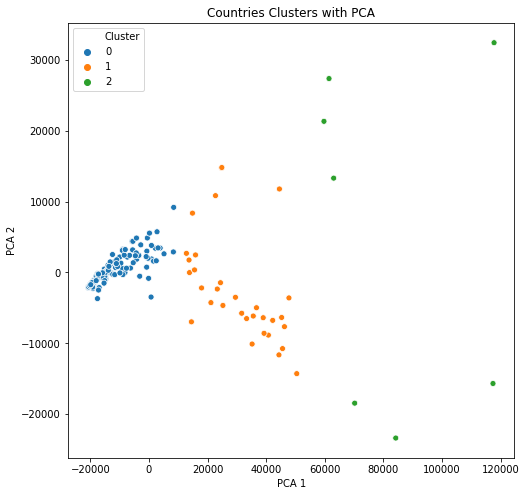

In [39]:
#Visualising country clusters with PCA
plt.figure(figsize=(8, 8))
g = sns.scatterplot(data=dataset_transformed, x= 'PCA 1', y='PCA 2', palette=sns.color_palette()[:3], hue='Cluster')
plt.title('Countries Clusters with PCA')
